In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv('cropdata/cpdata.csv')

In [3]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


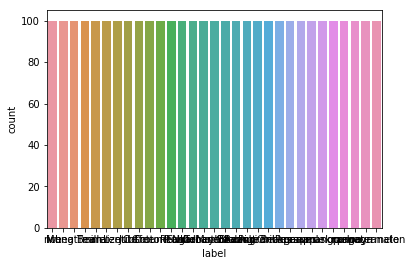

In [4]:
sns.countplot(data['label'])

In [5]:
data['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [6]:
dict_soil_type={'rice':'clay', 'wheat':'loamy', 'Mung Bean':'loamy', 'Tea':'sandy', 'millet':'alluvial', 'maize':'loamy', 'Lentil':'loamy',
       'Jute':'alluvial', 'Coffee':'volcanic', 'Cotton':'loamy', 'Ground Nut':'loamy', 'Peas':'loamy', 'Rubber':'loamy',
       'Sugarcane':'clay', 'Tobacco':'alluvial', 'Kidney Beans':'clay', 'Moth Beans':'sandy', 'Coconut':'sandy',
       'Black gram':'loamy', 'Adzuki Beans':'sandy', 'Pigeon Peas':'loamy', 'Chickpea':'loamy', 'banana':'loamy',
       'grapes':'sandy', 'apple':'loamy', 'mango':'alluvial', 'muskmelon':'sandy', 'orange':'loamy', 'papaya':'alluvial',
       'pomegranate':'alluvial', 'watermelon':'sandy'}

In [7]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data['label'].dtype

dtype('O')

In [9]:
len(data['label'].unique())

31

In [13]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization

In [14]:
data1=data.drop('label',axis=1)

In [15]:
data2=pd.get_dummies(data1)

In [16]:
labels=pd.get_dummies(data['label'])

In [17]:
labels.shape

(3100, 31)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
X_train,X_test,y_train,y_test=train_test_split(data2,labels)

In [20]:
X_train.shape

(2325, 4)

In [21]:
model=Sequential()
model.add(Dense(100,input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(31,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.fit(X_train,y_train,epochs=50,batch_size=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2325 samples, validate on 775 samples
Epoch 1/50
2325/2325 [==============================] - 5s 2ms/step - loss: 2.8457 - acc: 0.2477 - val_loss: 2.5943 - val_acc: 0.2090
Epoch 2/50
2325/2325 [==============================] - 0s 211us/step - loss: 2.0995 - acc: 0.4237 - val_loss: 2.2156 - val_acc: 0.2981
Epoch 3/50
2325/2325 [==============================] - 1s 218us/step - loss: 1.7297 - acc: 0.4955 - val_loss: 1.9278 - val_acc: 0.4258
Epoch 4/50
2325/2325 [==============================] - 0s 198us/step - loss: 1.5252 - acc: 0.5406 - val_loss: 1.6892 - val_acc: 0.4465
Epoch 5/50
2325/2325 [==============================] - 0s 199us/step - loss: 1.3805 - acc: 0.5940 - val_loss: 1.5825 - val_acc: 0.4594
Epoch 6/50
2325/2325 [==============================] - 0s 212us/step - loss: 1.2691 - acc: 0.6060 - val_loss: 1.3218 - val_acc: 0.6065
Epoch 7/50
2325/2325 [==============================] - 0s 204us/step - loss: 1.1799 - acc:

In [32]:
model.save('crop recommendation model 1.h5')

In [ ]:
label=list(labels.columns)

In [64]:
def results(test,label):
    a=model.predict(test)[0]
    res = sorted(range(len(a)), key = lambda sub: a[sub])[-4:]
    res.reverse()
    for i in res:
        print( '{}  :  {} %'.format(label[i],a[i] *100))
    

In [65]:
results(data2[0:2],label)

rice  :  65.9841537475586 %
Jute  :  31.207850575447083 %
papaya  :  1.189468801021576 %
orange  :  0.5352637730538845 %
